In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda
import myfunc as mf


In [2]:
# Import the dataset
data = pd.read_csv('PCA_phase1.csv')

# Inspect the dataset
print(data.info())
print('')
data.head()

#CHIEDITI SE CONVIENE RIMUOVERE UNA COLONNA(n>1, p=1)!!!
#data.drop(columns=['X2'], inplace=True)
#oppure:
#data2=data.copy()
#data2.drop(columns=['X2'], inplace=True) #lo tolgo solo dalla copia e l'altra originale me la lascio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_0     50 non-null     float64
 1   x_1     50 non-null     float64
 2   x_2     50 non-null     float64
dtypes: float64(3)
memory usage: 1.3 KB
None



,x_0,x_1,x_2
0,14.190257,9.176981,891.375082
1,16.959043,6.873015,874.338249
2,14.860838,8.458178,882.414130
3,14.877954,9.357558,880.352089
4,16.538917,7.855885,887.617506


In [3]:
cov_matrix = data.cov()
print(cov_matrix)
corr_matrix = data.corr()
print(corr_matrix)
#oppure per la corr matrix:
data_std = (data - data.mean()) / data.std() #data.mean() e data.std() sono o pandas series oppure np.array piatti
#e poi calcoli cov matrix di data_std se serve


          x_0       x_1        x_2
x_0  2.158298 -0.828828  -3.337194
x_1 -0.828828  1.258117   2.485486
x_2 -3.337194  2.485486  21.116646
          x_0       x_1       x_2
x_0  1.000000 -0.502977 -0.494326
x_1 -0.502977  1.000000  0.482212
x_2 -0.494326  0.482212  1.000000


In [4]:
[pca,scores_df]=mf.p_pca(data, len(data), standardize='yes')

Eigenvalues 
 [1.9863924  0.51885449 0.49475312]

Eigenvectors aka Loadings 
 [[-0.58159238  0.57692797  0.5735019 ]
 [ 0.17046647 -0.60291102  0.77938405]
 [-0.79541907 -0.55104666 -0.25230158]]

Explained variance ratio 
 [0.6621308  0.1729515  0.16491771]

Cumulative explained variance ratio 
 [0.6621308  0.83508229 1.        ]
first 5 rows of the df scores:
         z1        z2        z3
0  2.020354  0.822086 -0.285950
1 -2.387038 -0.507754  0.282240
2  0.266820 -0.233558  0.196108
3  0.465295 -1.064738 -0.141791
4 -0.057896  1.167417 -0.702245


In [5]:
alpha_fam=0.0027
alpha_sing=alpha_fam/2
k=stats.norm.ppf(1-alpha_sing/2)

In [6]:
z1=scores_df['z1']
z2=scores_df['z2']

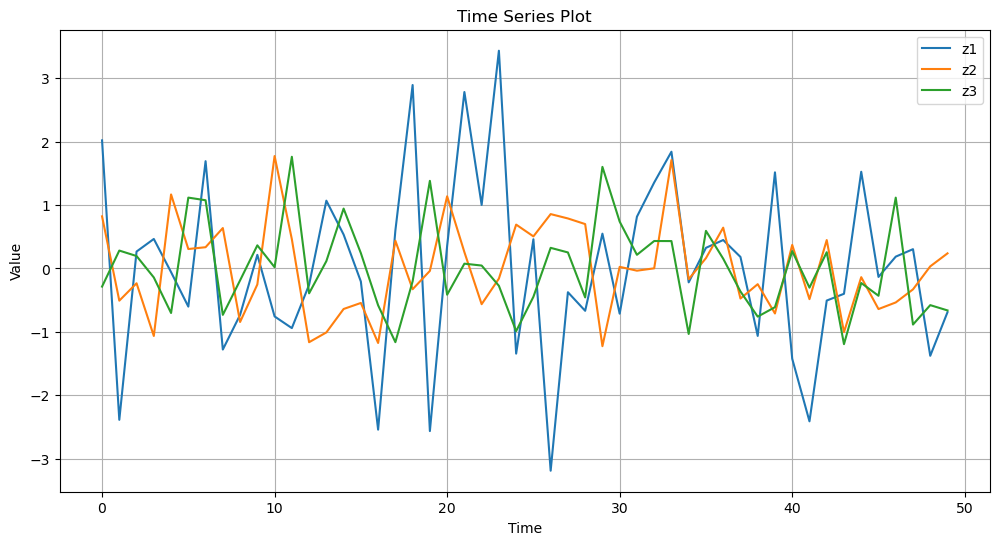

In [7]:
mf.multiple_ts_plot(scores_df)

p-value of the Shapiro-Wilk test: 0.65921
Accept H0: the data are normal
p-value of the Shapiro-Wilk test: 0.43242


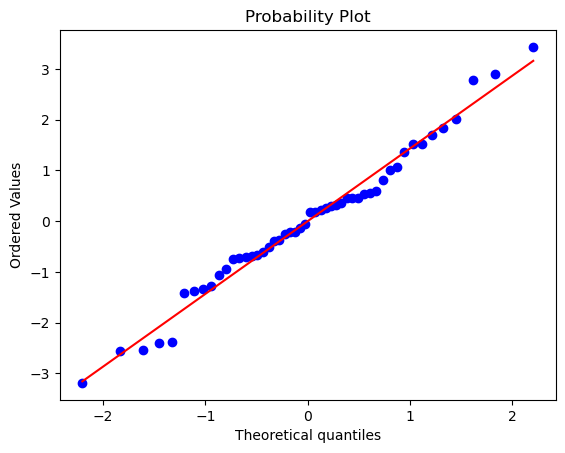

Accept H0: the data are normal


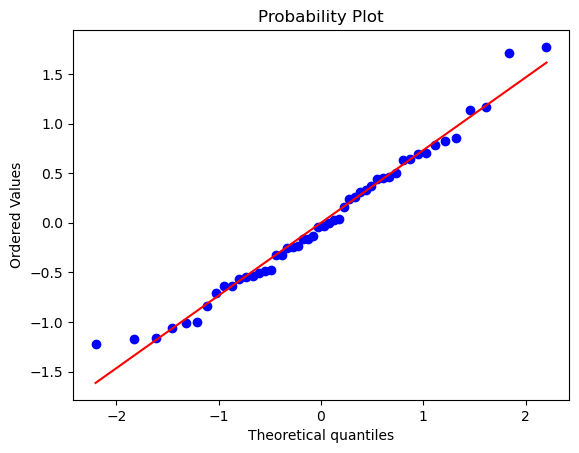

In [8]:
mf.shapiroqq(z1)
mf.shapiroqq(z2)

In [9]:
mf.runs(z1)
mf.runs(z2)

Runs test statistic = 0.572
Runs test p-value = 0.56763
Accept H0: the data are random
Runs test statistic = -0.847
Runs test p-value = 0.39684
Accept H0: the data are random


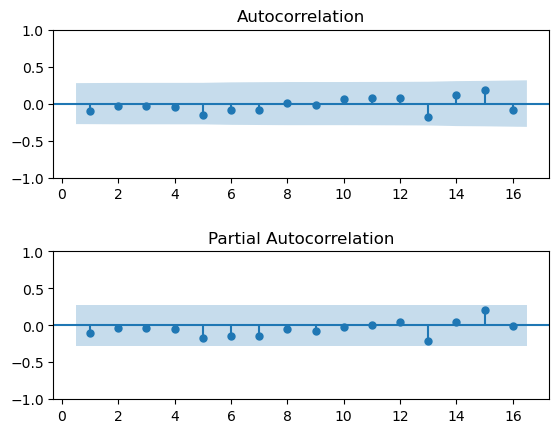

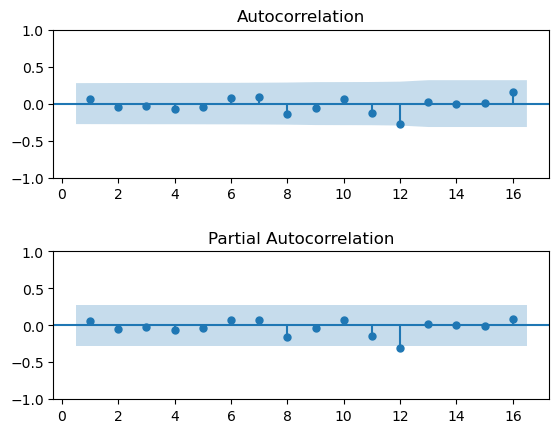

In [10]:
mf.acfpacf(z1)
mf.acfpacf(z2)

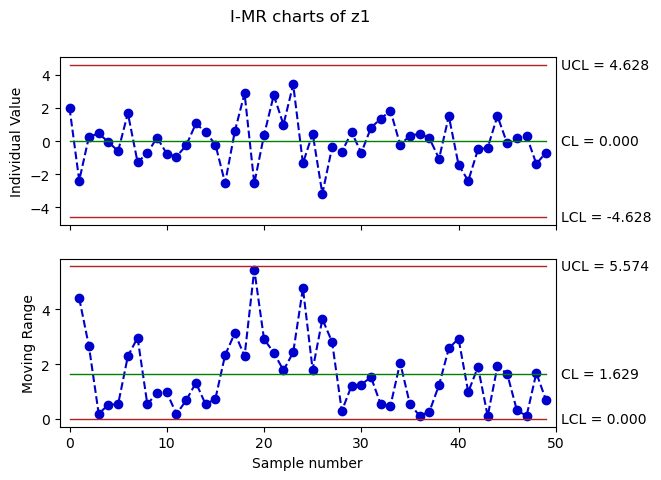

In [11]:
data_IMR1 = qda.ControlCharts.IMR(scores_df, 'z1',K=k)

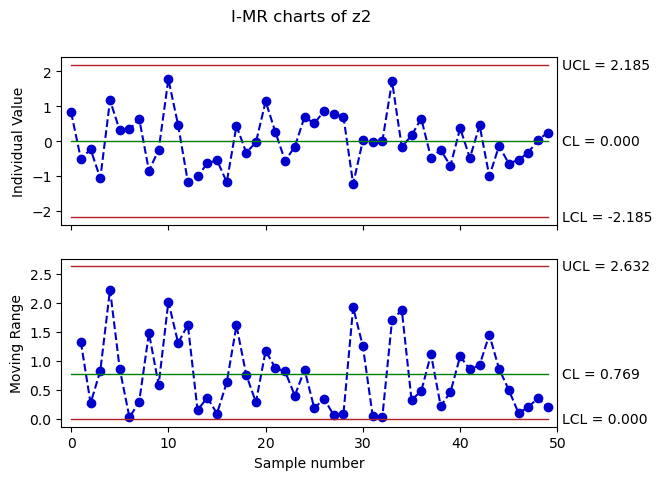

In [12]:
data_IMR2 = qda.ControlCharts.IMR(scores_df, 'z2',K=k)

In [13]:
data2 = pd.read_csv('PCA_phase2.csv')

# Inspect the dataset
print(data2.info())
print('')
data2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_0     50 non-null     float64
 1   x_1     50 non-null     float64
 2   x_2     50 non-null     float64
dtypes: float64(3)
memory usage: 1.3 KB
None



,x_0,x_1,x_2
0,16.073769,7.080233,884.406657
1,14.938765,8.169102,879.969145
2,17.357631,5.084435,880.795241
3,13.472548,9.070092,886.701174
4,11.811985,10.373006,892.470939


In [14]:
data_all = pd.concat([data,data2])

In [15]:
[pca_all,scores_df_all]=mf.p_pca(data_all, 50, standardize='yes')

Eigenvalues 
 [1.9863924  0.51885449 0.49475312]

Eigenvectors aka Loadings 
 [[-0.58159238  0.57692797  0.5735019 ]
 [ 0.17046647 -0.60291102  0.77938405]
 [-0.79541907 -0.55104666 -0.25230158]]

Explained variance ratio 
 [0.6621308  0.1729515  0.16491771]

Cumulative explained variance ratio 
 [0.6621308  0.83508229 1.        ]
first 5 rows of the df scores:
         z1        z2        z3
0  2.020354  0.822086 -0.285950
1 -2.387038 -0.507754  0.282240
2  0.266820 -0.233558  0.196108
3  0.465295 -1.064738 -0.141791
4 -0.057896  1.167417 -0.702245


In [16]:
scores_df2=scores_df_all[50:]

In [17]:
scores_df2.mean()

z1   -0.092712
z2    0.023076
z3   -0.054028
dtype: float64

In [18]:
scores_df2.var()

z1    3.065649
z2    0.459800
z3    0.594120
dtype: float64

In [19]:
[eigenvalues, eigenvectors,cumulative_explained_variance_ratio]=mf.compute_eigens(corr_matrix)

[1.9863924  0.51885449 0.49475312]
[[-0.58159238  0.17046647  0.79541907]
 [ 0.57692797 -0.60291102  0.55104666]
 [ 0.5735019   0.77938405  0.25230158]]
[0.6621308  0.83508229 1.        ]


In [20]:
X_projected_df2=mf.project_data_pca(data, data.mean(), cov_matrix, eigenvectors,2,standardize='yes')

       PC_1      PC_2
0  2.020354  0.822086
1 -2.387038 -0.507754
2  0.266820 -0.233558
3  0.465295 -1.064738
4 -0.057896  1.167417


In [21]:
mf.runs(scores_df2['z1'])


Runs test statistic = 0.000
Runs test p-value = 1.00000
Accept H0: the data are random


In [22]:
mf.runs(scores_df2['z2'])

Runs test statistic = 0.684
Runs test p-value = 0.49367
Accept H0: the data are random


p-value of the Shapiro-Wilk test: 0.87250
Accept H0: the data are normal
p-value of the Shapiro-Wilk test: 0.69584


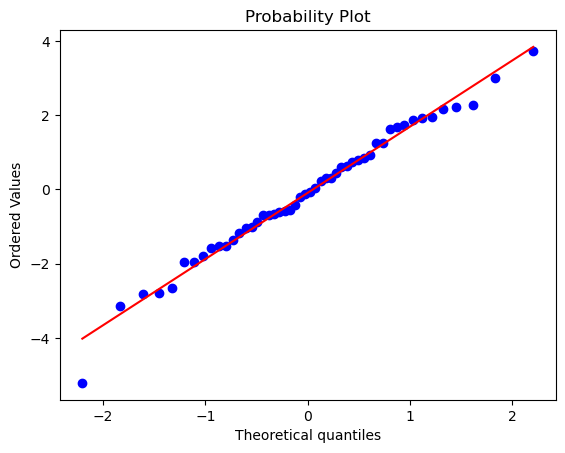

Accept H0: the data are normal


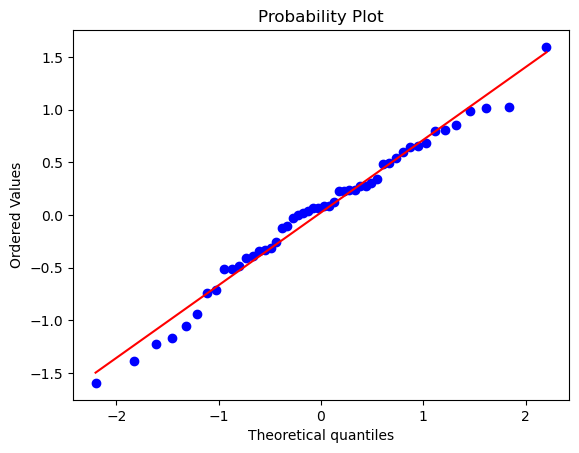

In [23]:
mf.shapiroqq(scores_df2['z1'])
mf.shapiroqq(scores_df2['z2'])

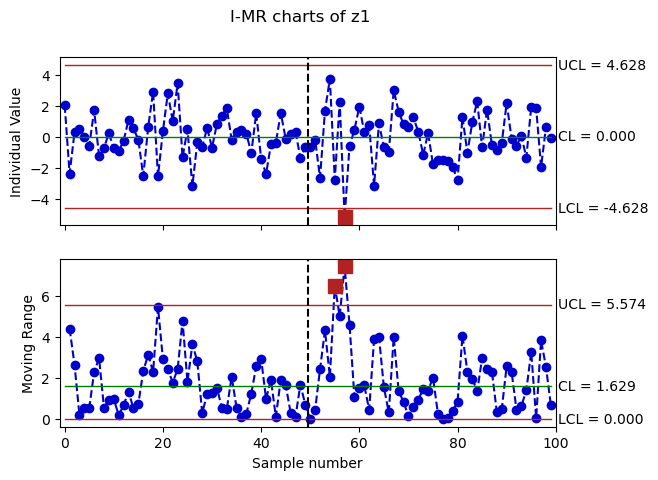

In [24]:
data_IMR1_all = qda.ControlCharts.IMR(scores_df_all, 'z1',K=k,subset_size=len(data))

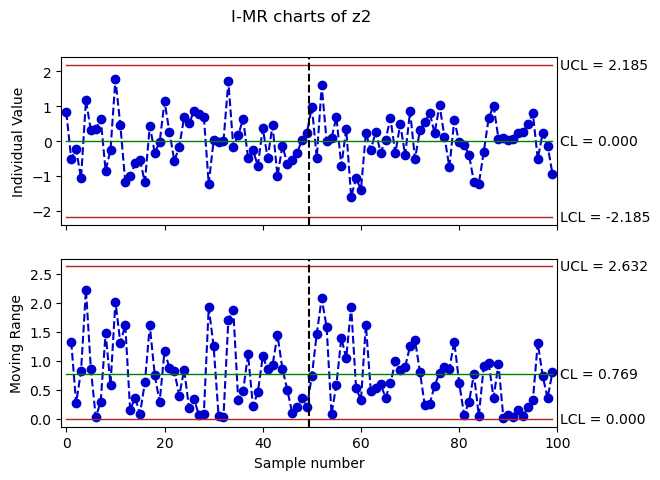

In [25]:
data_IMR2_all = qda.ControlCharts.IMR(scores_df_all, 'z2',K=k,subset_size=len(data))

In [26]:
reconstructed_data_with1pc=mf.reconstruct_from_pca_obj(data,pca,scores_df,1,from_standardize='yes') 

Original data
          x_0       x_1         x_2
0  14.190257  9.176981  891.375082
1  16.959043  6.873015  874.338249
2  14.860838  8.458178  882.414130
3  14.877954  9.357558  880.352089
4  16.538917  7.855885  887.617506

Reconstructed data
            0         1           2
0  13.650228  9.556183  888.099257
1  17.416018  6.704090  876.483996
2  15.148493  8.421443  883.477985
3  14.978911  8.549880  884.001047
4  15.425938  8.211315  882.622228


In [27]:
reconstructed_data_with1pc.mean()

0     15.376471
1      8.248780
2    882.774807
dtype: float64

In [28]:
reconstructed_data_with1pc.std()

0    1.204223
1    0.912041
2    3.714325
dtype: float64

In [29]:
reconstructed_data_with2pc=mf.reconstruct_from_pca_obj(data,pca,scores_df,2,from_standardize='yes') 

Original data
          x_0       x_1         x_2
0  14.190257  9.176981  891.375082
1  16.959043  6.873015  874.338249
2  14.860838  8.458178  882.414130
3  14.877954  9.357558  880.352089
4  16.538917  7.855885  887.617506

Reconstructed data
            0         1           2
0  13.856107  9.000239  891.043553
1  17.288858  7.047464  874.665478
2  15.090002  8.579389  882.641497
3  14.712263  9.269919  880.187697
4  15.718300  7.421837  886.803324


In [30]:
reconstructed_data_with2pc.mean()

0     15.376471
1      8.248780
2    882.774807
dtype: float64

In [31]:
reconstructed_data_with2pc.std()

0    1.217660
1    1.033976
2    4.522344
dtype: float64